In [129]:
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set() 

In [61]:
my_data = pd.read_csv("../data/1.04.+Real-life+example.csv")

my_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


Preprocessing 2024

Exploring the descriptive statistics of the variables 2024


In [62]:
my_data.describe( include = "all" )

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Determining the variables of interest 2024

In [63]:
data = my_data.drop( ["Model"], axis = 1 )
data.describe( include = "all"  )

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Dealing with missing values

In [64]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [65]:
data_no_mv = data.dropna( axis = 0 )
data_no_mv.describe( include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Explpring the PDFs 

/var/folders/8s/l3vqv8pn6g36b49fh8xy7tc00000gn/T/ipykernel_1442/19826432.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv [ "Price" ])


<Axes: xlabel='Price', ylabel='Density'>

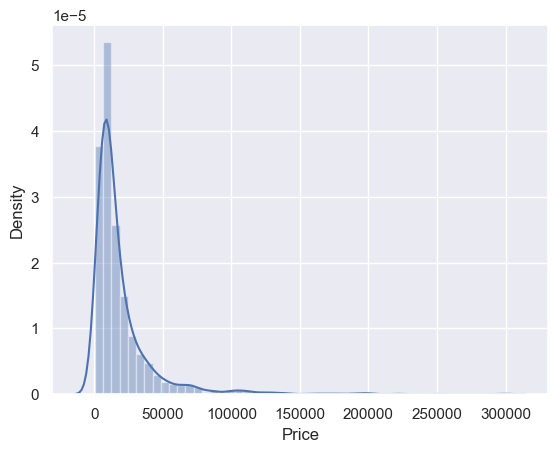

In [66]:
sns.distplot(data_no_mv [ "Price" ])

Dealing with outliers

In [67]:
quantile = data_no_mv[ "Price" ].quantile(0.99)
data_outliers_Price = data_no_mv[ data_no_mv [ "Price" ] < quantile ]
data_outliers_Price.describe( include = "all" )


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/var/folders/8s/l3vqv8pn6g36b49fh8xy7tc00000gn/T/ipykernel_1442/1340925291.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_outliers_Price [ "Price" ])


<Axes: xlabel='Price', ylabel='Density'>

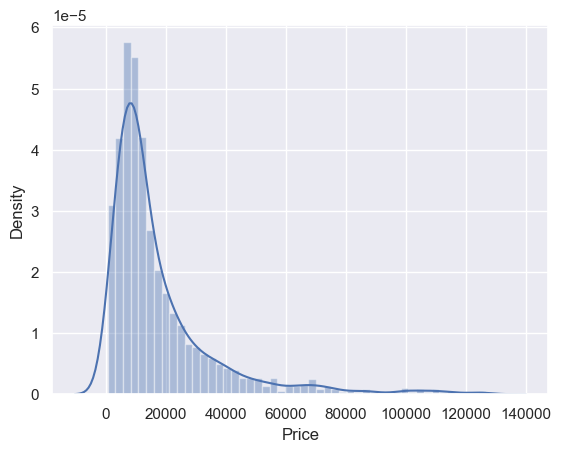

In [68]:
sns.distplot(data_outliers_Price [ "Price" ])

/var/folders/8s/l3vqv8pn6g36b49fh8xy7tc00000gn/T/ipykernel_1442/1582978464.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_outliers_Price [ "Mileage" ])


<Axes: xlabel='Mileage', ylabel='Density'>

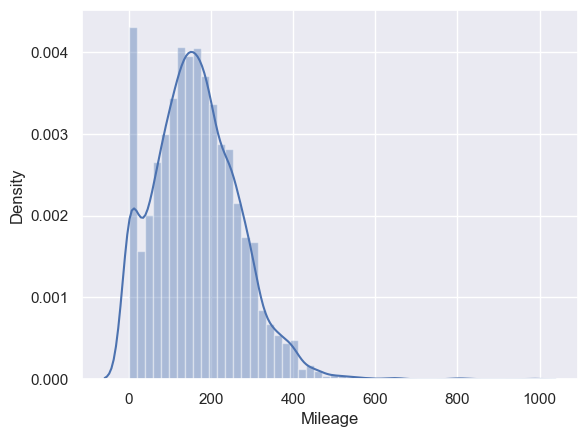

In [69]:
sns.distplot(data_outliers_Price [ "Mileage" ])

In [99]:
quantile = data_no_mv[ "Mileage" ].quantile(0.99)
data_outliers_Mileage = data_outliers_Price[ data_outliers_Price [ "Mileage" ] < quantile ]
data_outliers.describe( include = "all" )

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1516,NaN,NaN,1833,3616,NaN
mean,NaN,19668.596878,NaN,159.892570,2.768489,NaN,NaN,2006.479669
std,NaN,25893.860852,NaN,96.633975,4.960538,NaN,NaN,6.616733
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21962.250000,NaN,227.000000,3.000000,NaN,NaN,2012.000000


/var/folders/8s/l3vqv8pn6g36b49fh8xy7tc00000gn/T/ipykernel_1442/2716147437.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_outliers_Mileage [ "Mileage" ])


<Axes: xlabel='Mileage', ylabel='Density'>

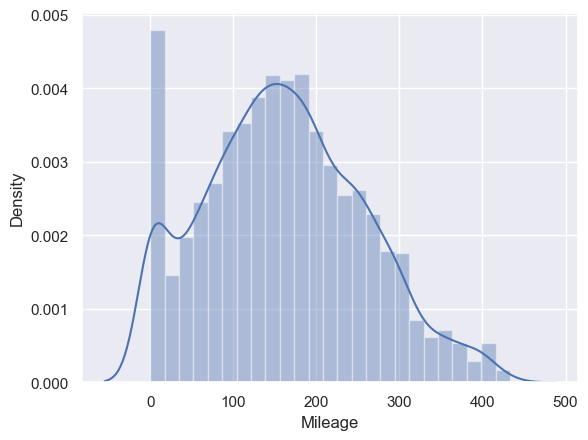

In [71]:
sns.distplot(data_outliers_Mileage [ "Mileage" ])


/var/folders/8s/l3vqv8pn6g36b49fh8xy7tc00000gn/T/ipykernel_1442/866300677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv [ "EngineV" ])


<Axes: xlabel='EngineV', ylabel='Density'>

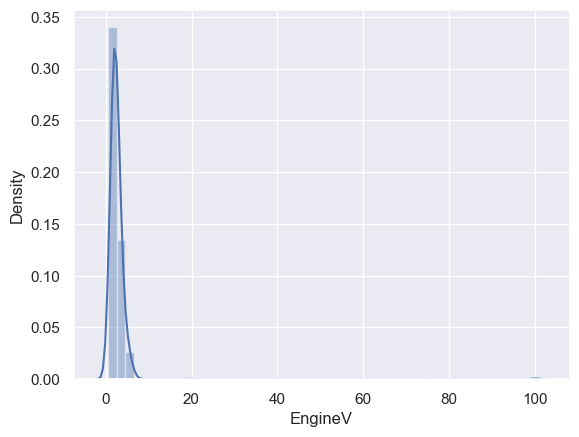

In [72]:
sns.distplot(data_no_mv [ "EngineV" ])

/var/folders/8s/l3vqv8pn6g36b49fh8xy7tc00000gn/T/ipykernel_1442/3783704897.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data_engine [ "EngineV" ] )


<Axes: xlabel='EngineV', ylabel='Density'>

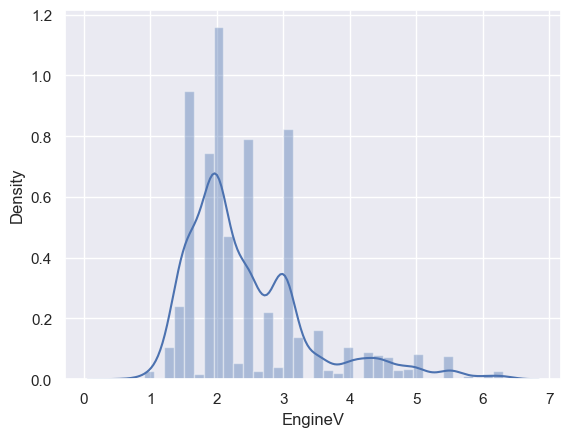

In [73]:
data_engine = data_outliers_Mileage[ data_outliers_Mileage [ "EngineV" ] < 6.5 ]
sns.distplot( data_engine [ "EngineV" ] )

/var/folders/8s/l3vqv8pn6g36b49fh8xy7tc00000gn/T/ipykernel_1442/3991620188.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data_no_mv[ "Year" ] )


<Axes: xlabel='Year', ylabel='Density'>

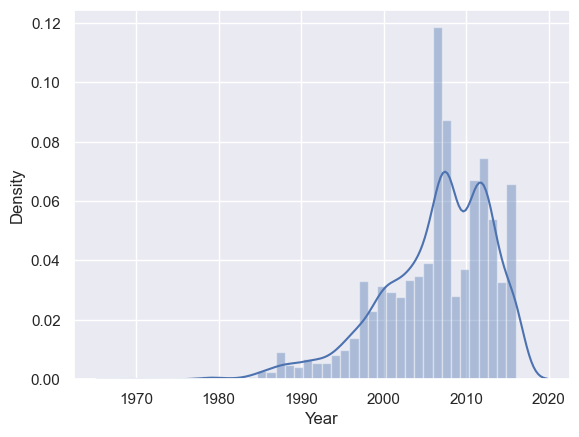

In [74]:
sns.distplot( data_no_mv[ "Year" ] )

In [75]:
quantile_Year = data_engine [ "Year" ].quantile(0.01)
data_outliers_Year = data_engine[ data_engine [ "Year" ] > quantile_Year ]
data_outliers_Year.describe( include = "all" )

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


/var/folders/8s/l3vqv8pn6g36b49fh8xy7tc00000gn/T/ipykernel_1442/494133915.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data_outliers_Year [ "Year" ] )


<Axes: xlabel='Year', ylabel='Density'>

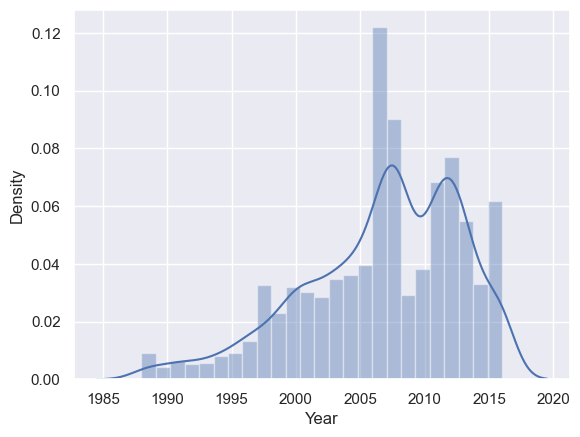

In [77]:
sns.distplot( data_outliers_Year [ "Year" ] )

In [106]:
data_cleaned = data_outliers_Year.reset_index( drop = True )
data_cleaned.describe( include = "all" ) 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140,9.415868
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235,0.876669
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,9.367344
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,9.985068


Checking the OLS assumtions

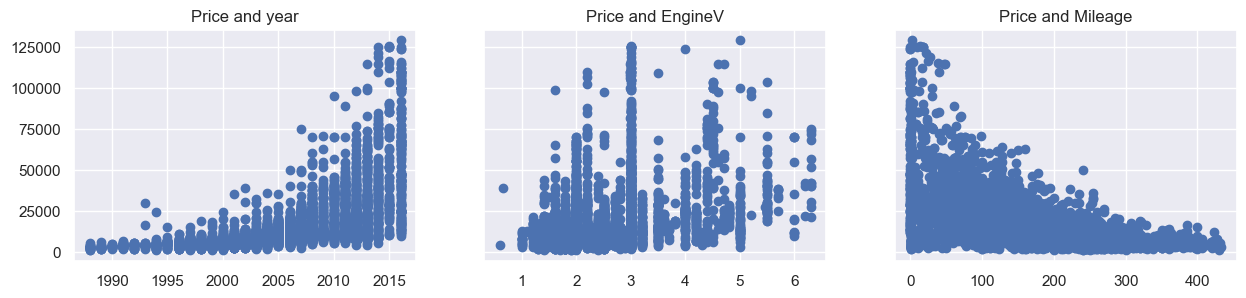

In [107]:
f, ( ax1, ax2, ax3 ) = plt.subplots( 1, 3, sharey = True, figsize = ( 15, 3) )
ax1.scatter( data_cleaned [ "Year" ], data_cleaned [ "Price" ])
ax1.set_title( "Price and year" )
ax2.scatter( data_cleaned [ "EngineV" ], data_cleaned [ "Price" ])
ax2.set_title( "Price and EngineV" )
ax3.scatter( data_cleaned [ "Mileage" ], data_cleaned [ "Price" ])
ax3.set_title( "Price and Mileage" )

plt.show()

Relaxing the assumprions

In [108]:
log_price = np.log( data_cleaned [ "Price" ])
data_cleaned[ "log_price" ] = log_price

data_cleaned


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3861,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3862,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3863,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3864,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


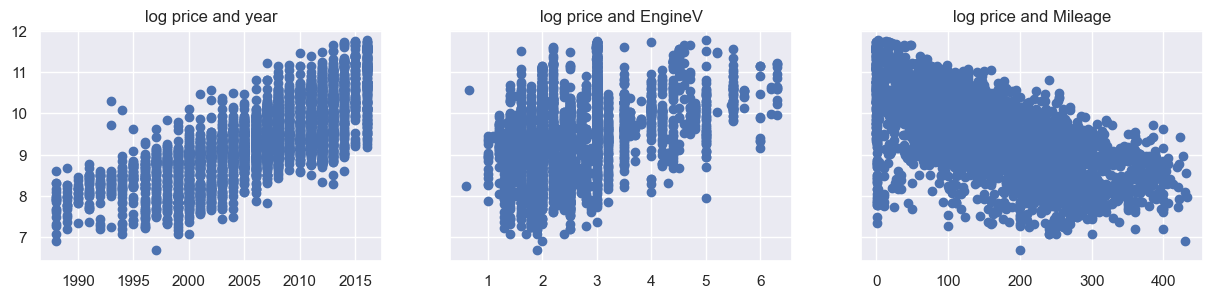

In [109]:
f, ( ax1, ax2, ax3 ) = plt.subplots( 1, 3, sharey = True, figsize = ( 15, 3) )
ax1.scatter( data_cleaned [ "Year" ], data_cleaned [ "log_price" ])
ax1.set_title( "log price and year" )
ax2.scatter( data_cleaned [ "EngineV" ], data_cleaned [ "log_price" ])
ax2.set_title( "log price and EngineV" )
ax3.scatter( data_cleaned [ "Mileage" ], data_cleaned [ "log_price" ])
ax3.set_title( "log price and Mileage" )

plt.show()

In [110]:

data_cleaned_without_Price = data_cleaned.drop( "Price", axis = 1 )

data_cleaned_without_Price

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3861,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3862,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3863,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3864,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


Multicollinearity

In [111]:
data_cleaned_without_Price.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

here shoud write why this function is importent

In [115]:
variables = data_cleaned_without_Price[[ "Mileage", "Year", "EngineV" ]]
vif = pd.DataFrame()
vif[ "VIF" ] = [variance_inflation_factor(variables.values, i ) for i in range(variables.shape[1])]
vif[ "Features" ] = variables.columns
vif

,VIF,Features
0,3.794319,Mileage
1,10.360888,Year
2,7.660317,EngineV


In [116]:
data_no_multicollinearity = data_cleaned_without_Price.drop( [ "Year" ], axis = 1)
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3861,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3862,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3863,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3864,BMW,sedan,1,3.5,Petrol,yes,8.779557


Create dummy variables

In [120]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)
data_with_dummies.head()


,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


Rearrange a bit

In [121]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [123]:
cols = [ 'log_price', 'Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes' ]

In [124]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


Linear regression model

Declare the inputs and the targets

In [125]:
targets = data_preprocessed[ "log_price" ]
inputs = data_preprocessed.drop([ "log_price"], axis = 1 )

Scale the data

In [127]:
scaler = StandardScaler()
scaler.fit( inputs )

StandardScaler()

In [128]:
inputs_sscaled = scaler.transform(inputs)

Train Test Split

In [131]:
x_train, x_test, y_train, y_test = train_test_split(inputs_sscaled, targets, test_size = 0.2, random_state = 365)

Create the regression

In [132]:
regression= LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [133]:
y_hat = regression.predict(x_train)

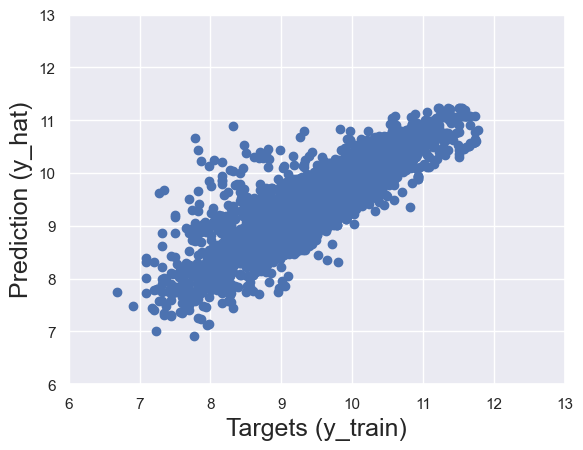

In [135]:
plt.scatter( y_train, y_hat )
plt.xlabel( "Targets (y_train)", size = 18 )
plt.ylabel( "Prediction (y_hat)", size = 18 )
plt.xlim( 6, 13 )
plt.ylim( 6, 13 )

plt.show()

/var/folders/8s/l3vqv8pn6g36b49fh8xy7tc00000gn/T/ipykernel_1442/2367407181.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( y_train - y_hat )


Text(0.5, 1.0, 'Residuals PDF')

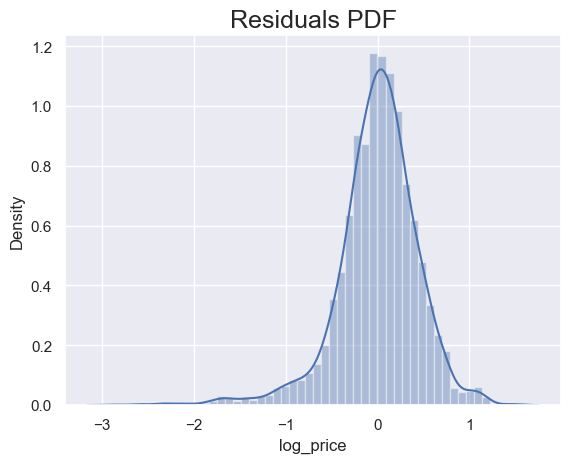

In [137]:
sns.distplot( y_train - y_hat )
plt.title("Residuals PDF", size = 18 )

In [138]:
regression.score(x_train, y_train)

0.7415645182486198

finding the weights and bias

In [139]:
regression.intercept_

9.413280072375791

In [140]:
regression.coef_

array([-0.44838367,  0.21092609,  0.01217236,  0.01091936, -0.13381235,
       -0.18243069, -0.05551416, -0.08742151, -0.15127967, -0.10115164,
       -0.19711525, -0.1281566 , -0.16265036, -0.12418232, -0.03326347,
       -0.14940858,  0.31944559])

In [142]:
regression_summary = pd.DataFrame(inputs.columns.values, columns = [ "Features" ])
regression_summary[ "Weights" ] = regression.coef_
regression_summary

,Features,Weights
0,Mileage,-0.448384
1,EngineV,0.210926
2,Brand_BMW,0.012172
3,Brand_Mercedes-Benz,0.010919
4,Brand_Mitsubishi,-0.133812
5,Brand_Renault,-0.182431
6,Brand_Toyota,-0.055514
7,Brand_Volkswagen,-0.087422
8,Body_hatch,-0.151280
9,Body_other,-0.101152


In [143]:
data_cleaned[ "Brand"].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

Testing

In [144]:
y_hat_test = regression.predict(x_test)

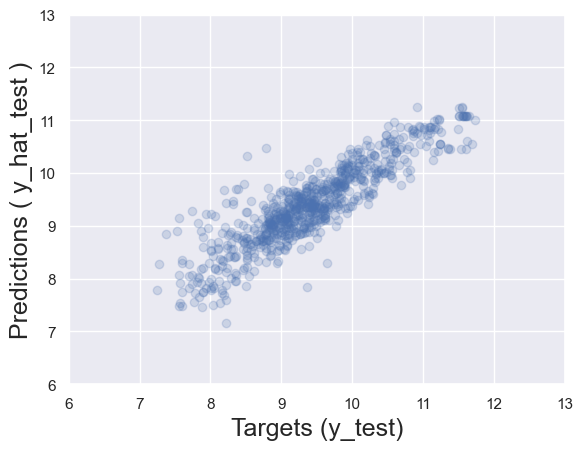

In [146]:
plt.scatter( y_test, y_hat_test, alpha = 0.2 )
plt.xlabel( "Targets (y_test)", size = 18 )
plt.ylabel( "Predictions ( y_hat_test )", size = 18 )
plt.xlim( 6, 13 )
plt.ylim( 6, 13 )
plt.show()

In [148]:
df_performance = pd.DataFrame(np.exp(y_hat_test), columns = [ "Prediction" ] )
df_performance.head()

,Prediction
0,10650.438709
1,8041.555683
2,6799.069945
3,7606.977689
4,11309.799759


In [149]:
y_test = y_test.reset_index(drop = True)
y_test.head()

0    7.740664
1    9.487972
2    8.999619
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [151]:
df_performance[ "Target" ] = np.exp(y_test)
df_performance.head()

,Prediction,Target
0,10650.438709,2300.0
1,8041.555683,13200.0
2,6799.069945,8100.0
3,7606.977689,6400.0
4,11309.799759,9150.0


In [153]:
df_performance[ "Residual" ] = df_performance[ "Target" ] - df_performance[ "Prediction" ]
df_performance[ "Difference%"] = np.absolute(df_performance[ "Residual" ] / df_performance[ "Target" ] * 100)
df_performance.head()

,Prediction,Target,Residual,Difference%
0,10650.438709,2300.0,-8350.438709,363.062553
1,8041.555683,13200.0,5158.444317,39.079124
2,6799.069945,8100.0,1300.930055,16.060865
3,7606.977689,6400.0,-1206.977689,18.859026
4,11309.799759,9150.0,-2159.799759,23.604369


In [155]:
df_performance.describe( include = "all" )

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16170.746881,18612.010504,2441.263622,33.814041
std,13742.956902,20953.006281,10835.145339,48.272151
min,1284.843010,1400.000000,-29171.365746,0.056793
25%,7489.039002,6999.250000,-2013.351405,11.277214
50%,11561.730997,11500.000000,150.474574,23.239276
75%,19726.158072,20500.000000,3293.698161,39.023878
max,77447.771561,124000.000000,80642.598057,507.418465
